In [1]:
!pip install --quiet datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


# Datasets Library

# 1. What if my dataset isn't on the Hub?

You know how to use the [Hugging Face Hub](https://huggingface.co/datasets) to download datasets, but you’ll often find yourself working with data that is stored either on your laptop or on a remote server. In this section we’ll show you how 🤗 Datasets can be used to load datasets that aren’t available on the Hugging Face Hub.

**Working with local and remote datasets**

🤗 Datasets provides loading scripts to handle the loading of local and remote datasets. It supports several common data formats, such as:

image.png

As shown in the table, for each data format we just need to specify the type of loading script in the load_dataset() function, along with a data_files argument that specifies the path to one or more files. Let’s start by loading a dataset from local files; later we’ll see how to do the same with remote files.

**Loading a local dataset**

For this example we’ll use the [SQuAD-it dataset](https://github.com/crux82/squad-it/), which is a large-scale dataset for question answering in Italian.

The training and test splits are hosted on GitHub, so we can download them with a simple wget command:

```
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-test.json.gz
```

This will download two compressed files called SQuAD_it-train.json.gz and SQuAD_it-test.json.gz, which we can decompress with the Linux gzip command:

```
!gzip -dkv SQuAD_it-*.json.gz
```
```
SQuAD_it-test.json.gz:	   87.4% -- replaced with SQuAD_it-test.json
SQuAD_it-train.json.gz:	   82.2% -- replaced with SQuAD_it-train.json
```

We can see that the compressed files have been replaced with SQuAD_it-train.json and SQuAD_it-test.json, and that the data is stored in the JSON format.

In [3]:
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-test.json.gz

--2024-07-06 09:21:57--  https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/crux82/squad-it/master/SQuAD_it-train.json.gz [following]
--2024-07-06 09:21:58--  https://raw.githubusercontent.com/crux82/squad-it/master/SQuAD_it-train.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7725286 (7.4M) [application/octet-stream]
Saving to: ‘SQuAD_it-train.json.gz’

SQuAD_it-train.json 100%[===================>]   7.37M  --.-KB/s    in 0.04s   

2024-07-06 09:21:58 (168 MB/s) - ‘SQuAD_it-train.json.gz’ saved [7725286/7725286]

--2024

In [4]:
!gzip -dkv SQuAD_it-*.json.gz

SQuAD_it-test.json.gz:	 87.5% -- created SQuAD_it-test.json
SQuAD_it-train.json.gz:	 82.3% -- created SQuAD_it-train.json


To load a JSON file with the load_dataset() function, we just need to know if we’re dealing with ordinary JSON (similar to a nested dictionary) or JSON Lines (line-separated JSON). Like many question answering datasets, SQuAD-it uses the nested format, with all the text stored in a data field. This means we can load the dataset by specifying the field argument as follows:

In [5]:
from datasets import load_dataset

squad_it_dataset = load_dataset("json", data_files="SQuAD_it-train.json", field="data")
squad_it_dataset

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
})

In [6]:
squad_it_dataset["train"][0]

{'title': 'Terremoto del Sichuan del 2008',
 'paragraphs': [{'context': "Il terremoto del Sichuan del 2008 o il terremoto del Gran Sichuan, misurato a 8.0 Ms e 7.9 Mw, e si è verificato alle 02:28:01 PM China Standard Time all' epicentro (06:28:01 UTC) il 12 maggio nella provincia del Sichuan, ha ucciso 69.197 persone e lasciato 18.222 dispersi.",
   'qas': [{'answers': [{'answer_start': 29, 'text': '2008'}],
     'id': '56cdca7862d2951400fa6826',
     'question': 'In quale anno si è verificato il terremoto nel Sichuan?'},
    {'answers': [{'answer_start': 232, 'text': '69.197'}],
     'id': '56cdca7862d2951400fa6828',
     'question': 'Quante persone sono state uccise come risultato?'},
    {'answers': [{'answer_start': 29, 'text': '2008'}],
     'id': '56d4f9902ccc5a1400d833c0',
     'question': 'Quale anno ha avuto luogo il terremoto del Sichuan?'},
    {'answers': [{'answer_start': 78, 'text': '8.0 Ms e 7.9 Mw'}],
     'id': '56d4f9902ccc5a1400d833c1',
     'question': 'Che cosa ha

Great, we’ve loaded our first local dataset! But while this worked for the training set, what we really want is to include both the train and test splits in a single DatasetDict object so we can apply Dataset.map() functions across both splits at once. To do this, we can provide a dictionary to the data_files argument that maps each split name to a file associated with that split:

In [7]:
data_files = {"train": "SQuAD_it-train.json", "test": "SQuAD_it-test.json"}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")
squad_it_dataset

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
    test: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 48
    })
})

This is exactly what we wanted. Now, we can apply various preprocessing techniques to clean up the data, tokenize the reviews, and so on.

The data_files argument of the load_dataset() function is quite flexible and can be either a single file path, a list of file paths, or a dictionary that maps split names to file paths. You can also glob files that match a specified pattern according to the rules used by the Unix shell (e.g., you can glob all the JSON files in a directory as a single split by setting data_files="*.json"). See the 🤗 Datasets documentation for more details.

The loading scripts in 🤗 Datasets actually support automatic decompression of the input files, so we could have skipped the use of gzip by pointing the data_files argument directly to the compressed files:

In [8]:
data_files = {"train": "SQuAD_it-train.json.gz", "test": "SQuAD_it-test.json.gz"}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

This can be useful if you don’t want to manually decompress many GZIP files. The automatic decompression also applies to other common formats like ZIP and TAR, so you just need to point data_files to the compressed files and you’re good to go!

Now that you know how to load local files on your laptop or desktop, let’s take a look at loading remote files.

**Loading a remote dataset**

If you’re working as a data scientist or coder in a company, there’s a good chance the datasets you want to analyze are stored on some remote server. Fortunately, loading remote files is just as simple as loading local ones! Instead of providing a path to local files, we point the data_files argument of load_dataset() to one or more URLs where the remote files are stored. For example, for the SQuAD-it dataset hosted on GitHub, we can just point data_files to the SQuAD_it-*.json.gz URLs as follows:

In [9]:
url = "https://github.com/crux82/squad-it/raw/master/"
data_files = {
    "train": url + "SQuAD_it-train.json.gz",
    "test": url + "SQuAD_it-test.json.gz",
}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

This returns the same DatasetDict object obtained above, but saves us the step of manually downloading and decompressing the SQuAD_it-*.json.gz files. This wraps up our foray into the various ways to load datasets that aren’t hosted on the Hugging Face Hub. Now that we’ve got a dataset to play with, let’s get our hands dirty with various data-wrangling techniques!

# 2. Time to slice and dice

Most of the time, the data you work with won’t be perfectly prepared for training models. In this section we’ll explore the various features that 🤗 Datasets provides to clean up your datasets.

**Slicing and dicing our data**

Similar to Pandas, 🤗 Datasets provides several functions to manipulate the contents of Dataset and DatasetDict objects. We already encountered the Dataset.map() method in Chapter 3, and in this section we’ll explore some of the other functions at our disposal.

For this example we’ll use the Drug Review Dataset that’s hosted on the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/), which contains patient reviews on various drugs, along with the condition being treated and a 10-star rating of the patient’s satisfaction.

First we need to download and extract the data, which can be done with the wget and unzip commands:

In [10]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip"
!unzip drugsCom_raw.zip

--2024-07-06 09:27:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip        [               <=>  ]  41.00M  11.6MB/s    in 4.4s    

2024-07-06 09:27:52 (9.41 MB/s) - ‘drugsCom_raw.zip’ saved [42989872]

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


Since TSV is just a variant of CSV that uses tabs instead of commas as the separator, we can load these files by using the csv loading script and specifying the delimiter argument in the load_dataset() function as follows:

In [11]:
from datasets import load_dataset

data_files = {"train": "drugsComTrain_raw.tsv", "test": "drugsComTest_raw.tsv"}
# \t is the tab character in Python
drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

A good practice when doing any sort of data analysis is to grab a small random sample to get a quick feel for the type of data you’re working with. In 🤗 Datasets, we can create a random sample by chaining the Dataset.shuffle() and Dataset.select() functions together:

In [12]:
drug_sample = drug_dataset["train"].shuffle(seed=42).select(range(1000))
# Peek at the first few examples
drug_sample[:3]

{'Unnamed: 0': [87571, 178045, 80482],
 'drugName': ['Naproxen', 'Duloxetine', 'Mobic'],
 'condition': ['Gout, Acute', 'ibromyalgia', 'Inflammatory Conditions'],
 'review': ['"like the previous person mention, I&#039;m a strong believer of aleve, it works faster for my gout than the prescription meds I take. No more going to the doctor for refills.....Aleve works!"',
  '"I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than the side effects."',
  '"I have been taking Mobic for over a year with no side effects other than 

Note that we’ve fixed the seed in Dataset.shuffle() for reproducibility purposes. Dataset.select() expects an iterable of indices, so we’ve passed range(1000) to grab the first 1,000 examples from the shuffled dataset. From this sample we can already see a few quirks in our dataset:

- The Unnamed: 0 column looks suspiciously like an anonymized ID for each patient.
- The condition column includes a mix of uppercase and lowercase labels.
- The reviews are of varying length and contain a mix of Python line separators (\r\n) as well as HTML character codes like &\#039;.

Let’s see how we can use 🤗 Datasets to deal with each of these issues. To test the patient ID hypothesis for the Unnamed: 0 column, we can use the Dataset.unique() function to verify that the number of IDs matches the number of rows in each split:

In [13]:
for split in drug_dataset.keys():
    assert len(drug_dataset[split]) == len(drug_dataset[split].unique("Unnamed: 0"))

This seems to confirm our hypothesis, so let’s clean up the dataset a bit by renaming the Unnamed: 0 column to something a bit more interpretable. We can use the DatasetDict.rename_column() function to rename the column across both splits in one go:

In [14]:
drug_dataset = drug_dataset.rename_column(
    original_column_name="Unnamed: 0", new_column_name="patient_id"
)
drug_dataset

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 161297
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 53766
    })
})

Next, let’s normalize all the condition labels using Dataset.map().

In [15]:
def lowercase_condition(example):
    return {"condition": example["condition"].lower()}


drug_dataset.map(lowercase_condition)

Map:   0%|          | 0/161297 [00:00<?, ? examples/s]

AttributeError: 'NoneType' object has no attribute 'lower'

Oh no, we’ve run into a problem with our map function! From the error we can infer that some of the entries in the condition column are None, which cannot be lowercased as they’re not strings. Let’s drop these rows using Dataset.filter(), which works in a similar way to Dataset.map() and expects a function that receives a single example of the dataset. Instead of writing an explicit function like:

In [16]:
def filter_nones(x):
    return x["condition"] is not None

and then running drug_dataset.filter(filter_nones), we can do this in one line using a lambda function. In Python, lambda functions are small functions that you can define without explicitly naming them. They take the general form:

```
lambda <arguments> : <expression>
```

where lambda is one of Python’s special keywords, <arguments> is a list/set of comma-separated values that define the inputs to the function, and <expression> represents the operations you wish to execute. For example, we can define a simple lambda function that squares a number as follows:

```
lambda x : x * x
```

To apply this function to an input, we need to wrap it and the input in parentheses:

```
(lambda x: x * x)(3)
9
```

Similarly, we can define lambda functions with multiple arguments by separating them with commas. For example, we can compute the area of a triangle as follows:

```
(lambda base, height: 0.5 * base * height)(4, 8)
16.0
```

In the 🤗 Datasets context, we can use lambda functions to define simple map and filter operations, so let’s use this trick to eliminate the None entries in our dataset:



In [17]:
drug_dataset = drug_dataset.filter(lambda x: x["condition"] is not None)

Filter:   0%|          | 0/161297 [00:00<?, ? examples/s]

Filter:   0%|          | 0/53766 [00:00<?, ? examples/s]

With the None entries removed, we can normalize our condition column:



In [18]:
drug_dataset = drug_dataset.map(lowercase_condition)
# Check that lowercasing worked
drug_dataset["train"]["condition"][:3]

Map:   0%|          | 0/160398 [00:00<?, ? examples/s]

Map:   0%|          | 0/53471 [00:00<?, ? examples/s]

['left ventricular dysfunction', 'adhd', 'birth control']

It works! Now that we’ve cleaned up the labels, let’s take a look at cleaning up the reviews themselves.



**Creating new columns**

Whenever you’re dealing with customer reviews, a good practice is to check the number of words in each review. A review might be just a single word like “Great!” or a full-blown essay with thousands of words, and depending on the use case you’ll need to handle these extremes differently. To compute the number of words in each review, we’ll use a rough heuristic based on splitting each text by whitespace.

Let’s define a simple function that counts the number of words in each review:

In [19]:
def compute_review_length(example):
    return {"review_length": len(example["review"].split())}

Unlike our lowercase_condition() function, compute_review_length() returns a dictionary whose key does not correspond to one of the column names in the dataset. In this case, when compute_review_length() is passed to Dataset.map(), it will be applied to all the rows in the dataset to create a new review_length column:



In [20]:
drug_dataset = drug_dataset.map(compute_review_length)
# Inspect the first training example
drug_dataset["train"][0]

Map:   0%|          | 0/160398 [00:00<?, ? examples/s]

Map:   0%|          | 0/53471 [00:00<?, ? examples/s]

{'patient_id': 206461,
 'drugName': 'Valsartan',
 'condition': 'left ventricular dysfunction',
 'review': '"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
 'rating': 9.0,
 'date': 'May 20, 2012',
 'usefulCount': 27,
 'review_length': 17}

As expected, we can see a review_length column has been added to our training set. We can sort this new column with Dataset.sort() to see what the extreme values look like:



In [21]:
drug_dataset["train"].sort("review_length")[:3]

{'patient_id': [111469, 13653, 53602],
 'drugName': ['Ledipasvir / sofosbuvir',
  'Amphetamine / dextroamphetamine',
  'Alesse'],
 'condition': ['hepatitis c', 'adhd', 'birth control'],
 'review': ['"Headache"', '"Great"', '"Awesome"'],
 'rating': [10.0, 10.0, 10.0],
 'date': ['February 3, 2015', 'October 20, 2009', 'November 23, 2015'],
 'usefulCount': [41, 3, 0],
 'review_length': [1, 1, 1]}

As we suspected, some reviews contain just a single word, which, although it may be okay for sentiment analysis, would not be informative if we want to predict the condition.

🙋 An alternative way to add new columns to a dataset is with the Dataset.add_column() function. This allows you to provide the column as a Python list or NumPy array and can be handy in situations where Dataset.map() is not well suited for your analysis.

Let’s use the Dataset.filter() function to remove reviews that contain fewer than 30 words. Similarly to what we did with the condition column, we can filter out the very short reviews by requiring that the reviews have a length above this threshold:

In [22]:
drug_dataset = drug_dataset.filter(lambda x: x["review_length"] > 30)
print(drug_dataset.num_rows)

Filter:   0%|          | 0/160398 [00:00<?, ? examples/s]

Filter:   0%|          | 0/53471 [00:00<?, ? examples/s]

{'train': 138514, 'test': 46108}


As you can see, this has removed around 15% of the reviews from our original training and test sets.

✏️ Try it out! Use the Dataset.sort() function to inspect the reviews with the largest numbers of words. See the [documentation](https://huggingface.co/docs/datasets/package_reference/main_classes#datasets.Dataset.sort) to see which argument you need to use sort the reviews by length in descending order.

The last thing we need to deal with is the presence of HTML character codes in our reviews. We can use Python’s html module to unescape these characters, like so:

In [23]:
import html

text = "I&#039;m a transformer called BERT"
html.unescape(text)

"I'm a transformer called BERT"

We’ll use Dataset.map() to unescape all the HTML characters in our corpus:



In [24]:
drug_dataset = drug_dataset.map(lambda x: {"review": html.unescape(x["review"])})

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

As you can see, the Dataset.map() method is quite useful for processing data — and we haven’t even scratched the surface of everything it can do!

**The map() mehod's superpowers**

The `Dataset.map()` method in its `batched` mode processes multiple examples at once, speeding up the operation. By setting `batched=True`, the map function receives and returns dictionaries where each field's value is a list of values. This can be useful for tasks like unescaping HTML characters, where processing batches instead of single elements can significantly reduce the processing time.

In [25]:
new_drug_dataset = drug_dataset.map(
    lambda x: {"review": [html.unescape(o) for o in x["review"]]}, batched=True
)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

Running the code with `batched=True` in a notebook is significantly faster than without it. This is not due to the data being preprocessed, but because list comprehensions are generally faster than for loops, and processing multiple elements simultaneously improves performance. Using `Dataset.map()` with `batched=True` is crucial for leveraging the speed of "fast" tokenizers, which can quickly process large lists of texts, as will be discussed in Chapter 6.

In [26]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["review"], truncation=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

we can pass one or several examples to the tokenizer, so we can use this function with or without batched=True. Let’s take this opportunity to compare the performance of the different options. In a notebook, you can time a one-line instruction by adding %time before the line of code you wish to measure:

In [27]:
%time tokenized_dataset = drug_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

CPU times: user 2min, sys: 1.21 s, total: 2min 1s
Wall time: 1min 41s


You can also time a whole cell by putting %%time at the beginning of the cell. On the hardware we executed this on, it showed 10.8s for this instruction (it’s the number written after “Wall time”).

✏️ Try it out! Execute the same instruction with and without batched=True, then try it with a slow tokenizer (add use_fast=False in the AutoTokenizer.from_pretrained() method) so you can see what numbers you get on your hardware.

Here are the results we obtained with and without batching, with a fast and a slow tokenizer:

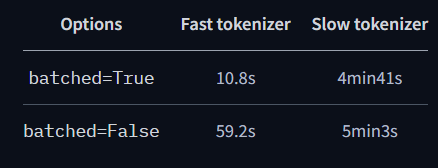

Fast tokenizers with the `batched=True` option are 30 times faster than slow tokenizers without batching due to the use of Rust, which facilitates parallelization. This speed advantage makes fast tokenizers the default in AutoTokenizer. Fast tokenizers achieve a nearly 6x speedup with batching by distributing the workload across multiple processes. While `Dataset.map()` also supports parallelization, it is less effective than Rust-based tokenizers but still useful, particularly for tokenizers without fast versions. Multiprocessing in `Dataset.map()` can be enabled with the `num_proc` argument to specify the number of processes.

In [ ]:
slow_tokenizer = AutoTokenizer.from_pretrained("bert-base-cased", use_fast=False)


def slow_tokenize_function(examples):
    return slow_tokenizer(examples["review"], truncation=True)


tokenized_dataset = drug_dataset.map(slow_tokenize_function, batched=True, num_proc=8)

You can experiment a little with timing to determine the optimal number of processes to use; in our case 8 seemed to produce the best speed gain. Here are the numbers we got with and without multiprocessing:

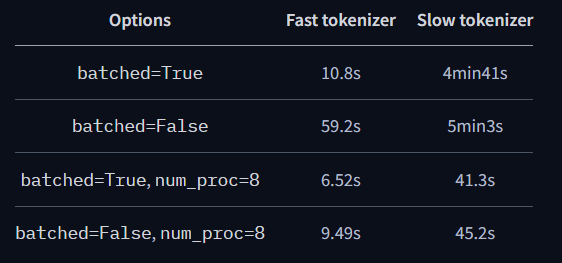

The results for the slow tokenizer are more reasonable now, and the fast tokenizer's performance has also improved significantly. However, this improvement is not consistent across different values of `num_proc`. Our tests showed that for values other than 8, using `batched=True` without `num_proc` was faster. Generally, we don't recommend using Python multiprocessing for fast tokenizers with `batched=True`.

Using `num_proc` to speed up processing is effective unless the function already performs multiprocessing.

The functionality of `Dataset.map()` with `batched=True` is impressive, allowing you to change the number of elements in your dataset. This is particularly useful for creating multiple training features from one example, which is necessary for several NLP tasks discussed in Chapter 7.

In machine learning, an example refers to the set of features fed to the model. In some contexts, these features are the dataset's columns, while in others, multiple features from a single example can belong to one column.

For tokenizing examples and truncating them to a maximum length of 128 while returning all text chunks, you can use `return_overflowing_tokens=True`.

In [29]:
def tokenize_and_split(examples):
    return tokenizer(
        examples["review"],
        truncation=True,
        max_length=128,
        return_overflowing_tokens=True,
    )

Let’s test this on one example before using Dataset.map() on the whole dataset:



In [30]:
result = tokenize_and_split(drug_dataset["train"][0])
[len(inp) for inp in result["input_ids"]]

[128, 49]

So, our first example in the training set became two features because it was tokenized to more than the maximum number of tokens we specified: the first one of length 128 and the second one of length 49. Now let’s do this for all elements of the dataset!

In [31]:
tokenized_dataset = drug_dataset.map(tokenize_and_split, batched=True)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

ArrowInvalid: Column 8 named input_ids expected length 1000 but got length 1463

Oh no! That didn’t work! Why not? Looking at the error message will give us a clue: there is a mismatch in the lengths of one of the columns, one being of length 1,463 and the other of length 1,000. If you’ve looked at the Dataset.map() documentation, you may recall that it’s the number of samples passed to the function that we are mapping; here those 1,000 examples gave 1,463 new features, resulting in a shape error.

The issue is that the two datasets we are trying to combine have different sizes: the `drug_dataset` has 1,000 examples, while the `tokenized_dataset` has 1,463 examples due to the tokenization process splitting long reviews into multiple examples. This size mismatch causes problems when creating a combined dataset. To resolve this, we need to either remove columns from the old dataset or adjust its size to match the new dataset. We can achieve the former by using the `remove_columns` argument.

In [32]:
tokenized_dataset = drug_dataset.map(
    tokenize_and_split, batched=True, remove_columns=drug_dataset["train"].column_names
)

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

Now this works without error. We can check that our new dataset has many more elements than the original dataset by comparing the lengths:



In [33]:
len(tokenized_dataset["train"]), len(drug_dataset["train"])

(206772, 138514)

We mentioned that we can also deal with the mismatched length problem by making the old columns the same size as the new ones. To do this, we will need the overflow_to_sample_mapping field the tokenizer returns when we set return_overflowing_tokens=True. It gives us a mapping from a new feature index to the index of the sample it originated from. Using this, we can associate each key present in our original dataset with a list of values of the right size by repeating the values of each example as many times as it generates new features:

In [34]:
def tokenize_and_split(examples):
    result = tokenizer(
        examples["review"],
        truncation=True,
        max_length=128,
        return_overflowing_tokens=True,
    )
    # Extract mapping between new and old indices
    sample_map = result.pop("overflow_to_sample_mapping")
    for key, values in examples.items():
        result[key] = [values[i] for i in sample_map]
    return result

We can see it works with Dataset.map() without us needing to remove the old columns:



In [35]:
tokenized_dataset = drug_dataset.map(tokenize_and_split, batched=True)
tokenized_dataset

Map:   0%|          | 0/138514 [00:00<?, ? examples/s]

Map:   0%|          | 0/46108 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 206772
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 68876
    })
})

We maintained the same number of training features as before while retaining all original fields, which can be useful for post-processing after model application. 🤗 Datasets offers versatile preprocessing capabilities, but sometimes switching to Pandas is necessary for advanced features like `DataFrame.groupby()` or visualization APIs. Fortunately, 🤗 Datasets is compatible with Pandas, NumPy, PyTorch, TensorFlow, and JAX. Let’s explore this interoperability further.

**From  datasets to DataFrames and back**

To enable the conversion between various third-party libraries, 🤗 Datasets provides a Dataset.set_format() function. This function only changes the output format of the dataset, so you can easily switch to another format without affecting the underlying data format, which is Apache Arrow. The formatting is done in place. To demonstrate, let’s convert our dataset to Pandas:

In [36]:
drug_dataset.set_format("pandas")

Now when we access elements of the dataset we get a pandas.DataFrame instead of a dictionary:



In [37]:
drug_dataset["train"][:3]

,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
0,95260,Guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,141
1,92703,Lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,134
2,138000,Ortho Evra,birth control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,89


Let’s create a pandas.DataFrame for the whole training set by selecting all the elements of drug_dataset["train"]:



In [38]:
train_df = drug_dataset["train"][:]

]
🚨 Under the hood, Dataset.set_format() changes the return format for the dataset’s __getitem__() dunder method. This means that when we want to create a new object like train_df from a Dataset in the "pandas" format, we need to slice the whole dataset to obtain a pandas.DataFrame. You can verify for yourself that the type of drug_dataset["train"] is Dataset, irrespective of the output format.

From here we can use all the Pandas functionality that we want. For example, we can do fancy chaining to compute the class distribution among the condition entries:



In [39]:
frequencies = (
    train_df["condition"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "condition", "condition": "frequency"})
)
frequencies.head()

,frequency,count
0,birth control,27655
1,depression,8023
2,acne,5209
3,anxiety,4991
4,pain,4744


And once we’re done with our Pandas analysis, we can always create a new Dataset object by using the Dataset.from_pandas() function as follows:

In [40]:
from datasets import Dataset

freq_dataset = Dataset.from_pandas(frequencies)
freq_dataset

Dataset({
    features: ['frequency', 'count'],
    num_rows: 819
})

This wraps up our tour of the various preprocessing techniques available in 🤗 Datasets. To round out the section, let’s create a validation set to prepare the dataset for training a classifier on. Before doing so, we’ll reset the output format of drug_dataset from "pandas" to "arrow":

In [41]:
drug_dataset.reset_format()

**Creating a validation set**

It is good practice to leave the test set untouched and create a separate validation set during model development. After optimizing performance on the validation set, you can then perform a final check on the test set to avoid overfitting and ensure the model performs well on real-world data.

🤗 Datasets offers a `Dataset.train_test_split()` function, similar to scikit-learn, to split the training set into training and validation sets, with an option to set a seed for reproducibility.

In [42]:
drug_dataset_clean = drug_dataset["train"].train_test_split(train_size=0.8, seed=42)
# Rename the default "test" split to "validation"
drug_dataset_clean["validation"] = drug_dataset_clean.pop("test")
# Add the "test" set to our `DatasetDict`
drug_dataset_clean["test"] = drug_dataset["test"]
drug_dataset_clean

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 110811
    })
    validation: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 27703
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 46108
    })
})

Great, we’ve now prepared a dataset that’s ready for training some models on! In section 5 we’ll show you how to upload datasets to the Hugging Face Hub, but for now let’s cap off our analysis by looking at a few ways you can save datasets on your local machine.



**Saving a dataset**

Although 🤗 Datasets will cache every downloaded dataset and the operations performed on it, there are times when you’ll want to save a dataset to disk (e.g., in case the cache gets deleted). As shown in the table below, 🤗 Datasets provides three main functions to save your dataset in different formats:

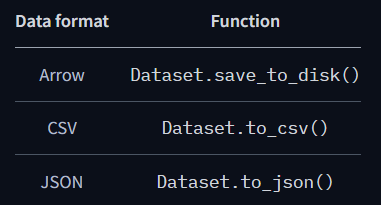

For example, let’s save our cleaned dataset in the Arrow format:



In [43]:
drug_dataset_clean.save_to_disk("drug-reviews")

Saving the dataset (0/1 shards):   0%|          | 0/110811 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/27703 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/46108 [00:00<?, ? examples/s]

This will create a directory with the following structure:



```
drug-reviews/
├── dataset_dict.json
├── test
│   ├── dataset.arrow
│   ├── dataset_info.json
│   └── state.json
├── train
│   ├── dataset.arrow
│   ├── dataset_info.json
│   ├── indices.arrow
│   └── state.json
└── validation
    ├── dataset.arrow
    ├── dataset_info.json
    ├── indices.arrow
    └── state.json
```

where we can see that each split is associated with its own dataset.arrow table, and some metadata in dataset_info.json and state.json. You can think of the Arrow format as a fancy table of columns and rows that is optimized for building high-performance applications that process and transport large datasets.

Once the dataset is saved, we can load it by using the load_from_disk() function as follows:

In [44]:
from datasets import load_from_disk

drug_dataset_reloaded = load_from_disk("drug-reviews")
drug_dataset_reloaded

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 110811
    })
    validation: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 27703
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 46108
    })
})

For the CSV and JSON formats, we have to store each split as a separate file. One way to do this is by iterating over the keys and values in the DatasetDict object:



In [45]:
for split, dataset in drug_dataset_clean.items():
    dataset.to_json(f"drug-reviews-{split}.jsonl")

Creating json from Arrow format:   0%|          | 0/111 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/47 [00:00<?, ?ba/s]

This saves each split in JSON Lines format, where each row in the dataset is stored as a single line of JSON. Here’s what the first example looks like:

In [46]:
!head -n 1 drug-reviews-train.jsonl

{"patient_id":89879,"drugName":"Cyclosporine","condition":"keratoconjunctivitis sicca","review":"\"I have used Restasis for about a year now and have seen almost no progress.  For most of my life I've had red and bothersome eyes. After trying various eye drops, my doctor recommended Restasis.  He said it typically takes 3 to 6 months for it to really kick in but it never did kick in.  When I put the drops in it burns my eyes for the first 30 - 40 minutes.  I've talked with my doctor about this and he said it is normal but should go away after some time, but it hasn't. Every year around spring time my eyes get terrible irritated  and this year has been the same (maybe even worse than other years) even though I've been using Restasis for a year now. The only difference I notice was for the first couple weeks, but now I'm ready to move on.\"","rating":2.0,"date":"April 20, 2013","usefulCount":69,"review_length":147}


In [47]:
data_files = {
    "train": "drug-reviews-train.jsonl",
    "validation": "drug-reviews-validation.jsonl",
    "test": "drug-reviews-test.jsonl",
}
drug_dataset_reloaded = load_dataset("json", data_files=data_files)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

And that’s it for our excursion into data wrangling with 🤗 Datasets! Now that we have a cleaned dataset for training a model on, here are a few ideas that you could try out:

1. Use the techniques from Chapter 3 to train a classifier that can predict the patient condition based on the drug review.
2. Use the summarization pipeline from Chapter 1 to generate summaries of the reviews.

Next, we’ll take a look at how 🤗 Datasets can enable you to work with huge datasets without blowing up your laptop!

# 3. Big data? Datasets to the rescue

Working with multi-gigabyte datasets is common, especially for pretraining transformers like BERT or GPT-2. Loading large datasets, such as the 40 GB WebText corpus for GPT-2, can be challenging due to memory constraints. However, the 🤗 Datasets library addresses these issues by treating datasets as memory-mapped files and streaming the corpus entries, thus avoiding memory management and hard drive limitations.

**What is the Pile?**

The Pile is an English text corpus that was created by EleutherAI for training large-scale language models. It includes a diverse range of datasets, spanning scientific articles, GitHub code repositories, and filtered web text. The training corpus is available in 14 GB chunks, and you can also download several of the individual components. Let’s start by taking a look at the PubMed Abstracts dataset, which is a corpus of abstracts from 15 million biomedical publications on PubMed. The dataset is in JSON Lines format and is compressed using the zstandard library, so first we need to install that:

In [56]:
!pip install zstandard

Next, we can load the dataset using the method for remote files that we learned

In [ ]:
from datasets import load_dataset, DownloadConfig
# doesnt work in the tutorial
data_files = "https://huggingface.co/datasets/qualis2006/PUBMED_title_abstracts_2020_baseline/resolve/main/PUBMED_title_abstracts_2020_baseline.jsonl.zst"
pubmed_dataset = load_dataset(
    "json",
    data_files=data_files,
    split="train",
    download_config=DownloadConfig(delete_extracted=True),  # optional argument
)

We can see that there are 15,518,009 rows and 2 columns in our dataset — that’s a lot!

✎ By default, 🤗 Datasets will decompress the files needed to load a dataset. If you want to preserve hard drive space, you can pass DownloadConfig(delete_extracted=True) to the download_config argument of load_dataset(). See the documentation for more details.

Let’s inspect the contents of the first example:

In [ ]:
pubmed_dataset[0]

Okay, this looks like the abstract from a medical article. Now let’s see how much RAM we’ve used to load the dataset!



**The magic of memory mapping**

A simple way to measure memory usage in Python is with the psutil library, which can be installed with pip as follows:



In [53]:
!pip install --quiet psutil

It provides a Process class that allows us to check the memory usage of the current process as follows:



In [ ]:
import psutil

# Process.memory_info is expressed in bytes, so convert to megabytes
print(f"RAM used: {psutil.Process().memory_info().rss / (1024 * 1024):.2f} MB")

Here the rss attribute refers to the resident set size, which is the fraction of memory that a process occupies in RAM. This measurement also includes the memory used by the Python interpreter and the libraries we’ve loaded, so the actual amount of memory used to load the dataset is a bit smaller. For comparison, let’s see how large the dataset is on disk, using the dataset_size attribute. Since the result is expressed in bytes like before, we need to manually convert it to gigabytes:

In [ ]:
print(f"Number of files in dataset : {pubmed_dataset.dataset_size}")
size_gb = pubmed_dataset.dataset_size / (1024**3)
print(f"Dataset size (cache file) : {size_gb:.2f} GB")

Nice — despite it being almost 20 GB large, we’re able to load and access the dataset with much less RAM!

The text describes an experiment where you load a dataset from the Pile that exceeds your computer's RAM using the 🤗 Datasets library. This approach contrasts with the typical rule of thumb that working with datasets requires 5 to 10 times the RAM size of the dataset. 🤗 Datasets solves this memory management issue by treating datasets as memory-mapped files, allowing operations on the dataset without fully loading it into memory. This method, facilitated by the Apache Arrow format and the pyarrow library, enables efficient parallel processing and quick data access. The text encourages trying this method with the PubMed Abstracts dataset to see the performance benefits in action.

In [ ]:
import timeit

code_snippet = """batch_size = 1000

for idx in range(0, len(pubmed_dataset), batch_size):
    _ = pubmed_dataset[idx:idx + batch_size]
"""

time = timeit.timeit(stmt=code_snippet, number=1, globals=globals())
print(
    f"Iterated over {len(pubmed_dataset)} examples (about {size_gb:.1f} GB) in "
    f"{time:.1f}s, i.e. {size_gb/time:.3f} GB/s"
)

The Python `timeit` module was used to measure the execution time of `code_snippet`. Typically, iterating over a dataset can achieve speeds from a few tenths of a GB/s to several GB/s, which is sufficient for most applications. However, some datasets are too large to store on a laptop's hard drive; for instance, downloading the entire Pile dataset would require 825 GB of disk space. To handle such cases, 🤗 Datasets offers a streaming feature that allows elements to be downloaded and accessed on-the-fly without needing to download the entire dataset. In Jupyter notebooks, you can also time cells using the `%%timeit` magic function.

**Streamling datasets**

To enable dataset streaming you just need to pass the streaming=True argument to the load_dataset() function. For example, let’s load the PubMed Abstracts dataset again, but in streaming mode:



In [54]:
pubmed_dataset_streamed = load_dataset(
    "json", data_files=data_files, split="train", streaming=True
)

Instead of the familiar Dataset that we’ve encountered elsewhere in this chapter, the object returned with streaming=True is an IterableDataset. As the name suggests, to access the elements of an IterableDataset we need to iterate over it. We can access the first element of our streamed dataset as follows:



In [55]:
next(iter(pubmed_dataset_streamed))

ValueError: Compression type zstd not supported

The elements from a streamed dataset can be processed on the fly using IterableDataset.map(), which is useful during training if you need to tokenize the inputs. The process is exactly the same as the one we used to tokenize our dataset in Chapter 3, with the only difference being that outputs are returned one by one:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
tokenized_dataset = pubmed_dataset_streamed.map(lambda x: tokenizer(x["text"]))
next(iter(tokenized_dataset))

💡 To speed up tokenization with streaming you can pass batched=True, as we saw in the last section. It will process the examples batch by batch; the default batch size is 1,000 and can be specified with the batch_size argument.

You can also shuffle a streamed dataset using IterableDataset.shuffle(), but unlike Dataset.shuffle() this only shuffles the elements in a predefined buffer_size:

In [ ]:
shuffled_dataset = pubmed_dataset_streamed.shuffle(buffer_size=10_000, seed=42)
next(iter(shuffled_dataset))

In this example, we selected a random example from the first 10,000 examples in the buffer. Once an example is accessed, its spot in the buffer is filled with the next example in the corpus (i.e., the 10,001st example in the case above). You can also select elements from a streamed dataset using the IterableDataset.take() and IterableDataset.skip() functions, which act in a similar way to Dataset.select(). For example, to select the first 5 examples in the PubMed Abstracts dataset we can do the following:

In [ ]:
dataset_head = pubmed_dataset_streamed.take(5)
list(dataset_head)

Similarly, you can use the IterableDataset.skip() function to create training and validation splits from a shuffled dataset as follows:



In [ ]:
# Skip the first 1,000 examples and include the rest in the training set
train_dataset = shuffled_dataset.skip(1000)
# Take the first 1,000 examples for the validation set
validation_dataset = shuffled_dataset.take(1000)

Let’s round out our exploration of dataset streaming with a common application: combining multiple datasets together to create a single corpus. 🤗 Datasets provides an interleave_datasets() function that converts a list of IterableDataset objects into a single IterableDataset, where the elements of the new dataset are obtained by alternating among the source examples. This function is especially useful when you’re trying to combine large datasets, so as an example let’s stream the FreeLaw subset of the Pile, which is a 51 GB dataset of legal opinions from US courts:

In [ ]:
law_dataset_streamed = load_dataset(
    "json",
    data_files="https://the-eye.eu/public/AI/pile_preliminary_components/FreeLaw_Opinions.jsonl.zst",
    split="train",
    streaming=True,
)
next(iter(law_dataset_streamed))

This dataset is large enough to stress the RAM of most laptops, yet we’ve been able to load and access it without breaking a sweat! Let’s now combine the examples from the FreeLaw and PubMed Abstracts datasets with the interleave_datasets() function:



In [ ]:
from itertools import islice
from datasets import interleave_datasets

combined_dataset = interleave_datasets([pubmed_dataset_streamed, law_dataset_streamed])
list(islice(combined_dataset, 2))

Here we’ve used the islice() function from Python’s itertools module to select the first two examples from the combined dataset, and we can see that they match the first examples from each of the two source datasets.

Finally, if you want to stream the Pile in its 825 GB entirety, you can grab all the prepared files as follows:



In [ ]:
base_url = "https://the-eye.eu/public/AI/pile/"
data_files = {
    "train": [base_url + "train/" + f"{idx:02d}.jsonl.zst" for idx in range(30)],
    "validation": base_url + "val.jsonl.zst",
    "test": base_url + "test.jsonl.zst",
}
pile_dataset = load_dataset("json", data_files=data_files, streaming=True)
next(iter(pile_dataset["train"]))

✏️ Try it out! Use one of the large Common Crawl corpora like mc4 or oscar to create a streaming multilingual dataset that represents the spoken proportions of languages in a country of your choice. For example, the four national languages in Switzerland are German, French, Italian, and Romansh, so you could try creating a Swiss corpus by sampling the Oscar subsets according to their spoken proportion.

You now have all the tools you need to load and process datasets of all shapes and sizes — but unless you’re exceptionally lucky, there will come a point in your NLP journey where you’ll have to actually create a dataset to solve the problem at hand. That’s the topic of the next section!

# 4. Creating your own dataset

To build NLP applications, sometimes the necessary dataset isn't readily available, necessitating its creation. This guide demonstrates how to construct a corpus from GitHub issues, commonly used for tracking bugs or features in repositories. This corpus serves several purposes:

1. Analyzing closure times for open issues or pull requests.
2. Training a multilabel classifier to tag issues with metadata (e.g., "bug," "enhancement," "question").
3. Developing a semantic search engine to match user queries with relevant issues.

The focus here is on corpus creation using GitHub issues from the popular open-source project 🤗 Datasets. Subsequent sections will delve into building a semantic search application based on this data.

**Getting the data**

You can find all the issues in 🤗 Datasets by navigating to the repository’s [Issues tab](https://github.com/huggingface/datasets/issues).

If you click on one of these issues you’ll find it contains a title, a description, and a set of labels that characterize the issue.

To download all the repository’s issues, we’ll use the GitHub REST API to poll the Issues endpoint. This endpoint returns a list of JSON objects, with each object containing a large number of fields that include the title and description as well as metadata about the status of the issue and so on.

A convenient way to download the issues is via the requests library, which is the standard way for making HTTP requests in Python. You can install the library by running:

In [62]:
!pip install --quiet requests

Once the library is installed, you can make GET requests to the Issues endpoint by invoking the requests.get() function. For example, you can run the following command to retrieve the first issue on the first page:



In [65]:
import requests

url = "https://api.github.com/repos/huggingface/datasets/issues?page=1&per_page=1"
response = requests.get(url)
response.status_code, response.json()

(200,
 [{'url': 'https://api.github.com/repos/huggingface/datasets/issues/7030',
   'repository_url': 'https://api.github.com/repos/huggingface/datasets',
   'labels_url': 'https://api.github.com/repos/huggingface/datasets/issues/7030/labels{/name}',
   'comments_url': 'https://api.github.com/repos/huggingface/datasets/issues/7030/comments',
   'events_url': 'https://api.github.com/repos/huggingface/datasets/issues/7030/events',
   'html_url': 'https://github.com/huggingface/datasets/issues/7030',
   'id': 2393411631,
   'node_id': 'I_kwDODunzps6OqJAv',
   'number': 7030,
   'title': 'Add option to disable progress bar when reading a dataset ("Loading dataset from disk")',
   'user': {'login': 'yuvalkirstain',
    'id': 57996478,
    'node_id': 'MDQ6VXNlcjU3OTk2NDc4',
    'avatar_url': 'https://avatars.githubusercontent.com/u/57996478?v=4',
    'gravatar_id': '',
    'url': 'https://api.github.com/users/yuvalkirstain',
    'html_url': 'https://github.com/yuvalkirstain',
    'followers_

Whoa, that’s a lot of information! We can see useful fields like title, body, and number that describe the issue, as well as information about the GitHub user who opened the issue.

As described in the GitHub documentation, unauthenticated requests are limited to 60 requests per hour. Although you can increase the per_page query parameter to reduce the number of requests you make, you will still hit the rate limit on any repository that has more than a few thousand issues. So instead, you should follow GitHub’s instructions on creating a personal access token so that you can boost the rate limit to 5,000 requests per hour. Once you have your token, you can include it as part of the request header:

In [70]:
GITHUB_TOKEN = "xxx"  # Copy your GitHub token here
headers = {"Authorization": f"token {GITHUB_TOKEN}"}

⚠️ Do not share a notebook with your GITHUB_TOKEN pasted in it. We recommend you delete the last cell once you have executed it to avoid leaking this information accidentally. Even better, store the token in a .env file and use the python-dotenv library to load it automatically for you as an environment variable.

Now that we have our access token, let’s create a function that can download all the issues from a GitHub repository:

In [75]:
import time
import math
from pathlib import Path
import pandas as pd
from tqdm.notebook import tqdm


def fetch_issues(
    owner="huggingface",
    repo="datasets",
    num_issues=5_000,
    rate_limit=5_000,
    issues_path=Path("."),
):
    if not issues_path.is_dir():
        issues_path.mkdir(exist_ok=True)

    batch = []
    all_issues = []
    per_page = 100  # Number of issues to return per page
    num_pages = math.ceil(num_issues / per_page)
    base_url = "https://api.github.com/repos"

    for page in tqdm(range(num_pages)):
        # Query with state=all to get both open and closed issues
        query = f"issues?page={page}&per_page={per_page}&state=all"
        issues = requests.get(f"{base_url}/{owner}/{repo}/{query}", headers=headers)
        batch.extend(issues.json())

        if len(batch) > rate_limit and len(all_issues) < num_issues:
            all_issues.extend(batch)
            batch = []  # Flush batch for next time period
            print(f"Reached GitHub rate limit. Sleeping for one hour ...")
            time.sleep(60 * 60 + 1)

    all_issues.extend(batch)
    df = pd.DataFrame.from_records(all_issues)
    df.to_json(f"{issues_path}/{repo}-issues.jsonl", orient="records", lines=True)
    print(
        f"Downloaded all the issues for {repo}! Dataset stored at {issues_path}/{repo}-issues.jsonl"
    )

Now when we call fetch_issues() it will download all the issues in batches to avoid exceeding GitHub’s limit on the number of requests per hour; the result will be stored in a repository_name-issues.jsonl file, where each line is a JSON object the represents an issue. Let’s use this function to grab all the issues from 🤗 Datasets:

In [76]:
fetch_issues()

  0%|          | 0/50 [00:00<?, ?it/s]

Downloaded all the issues for datasets! Dataset stored at ./datasets-issues.jsonl


Once the issues are downloaded we can load them locally using our newfound skills

In [78]:
issues_dataset = load_dataset("json", data_files="datasets-issues.jsonl", split="train")
issues_dataset

Generating train split: 0 examples [00:00, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset

In [ ]:
Dataset({
    features: ['url', 'repository_url', 'labels_url', 'comments_url', 'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments', 'created_at', 'updated_at', 'closed_at', 'author_association', 'active_lock_reason', 'pull_request', 'body', 'timeline_url', 'performed_via_github_app'],
    num_rows: 3019
})

In [80]:
issues_dataset = load_dataset("lewtun/github-issues", split="train")
issues_dataset

Repo card metadata block was not found. Setting CardData to empty.


Dataset({
    features: ['url', 'repository_url', 'labels_url', 'comments_url', 'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments', 'created_at', 'updated_at', 'closed_at', 'author_association', 'active_lock_reason', 'pull_request', 'body', 'timeline_url', 'performed_via_github_app', 'is_pull_request'],
    num_rows: 3019
})

The newly created dataset contains several thousand entries, which initially seems excessive compared to the approximately 1,000 issues visible in the 🤗 Datasets repository's Issues tab. This discrepancy arises because GitHub's API treats every pull request as an issue, though not every issue is a pull request. To differentiate between regular issues and pull requests, and to align with GitHub's API behavior, some minor preprocessing is needed.

**Cleaning up the data**

In [81]:
sample = issues_dataset.shuffle(seed=666).select(range(3))

# Print out the URL and pull request entries
for url, pr in zip(sample["html_url"], sample["pull_request"]):
    print(f">> URL: {url}")
    print(f">> Pull request: {pr}\n")

>> URL: https://github.com/huggingface/datasets/pull/850
>> Pull request: {'url': 'https://api.github.com/repos/huggingface/datasets/pulls/850', 'html_url': 'https://github.com/huggingface/datasets/pull/850', 'diff_url': 'https://github.com/huggingface/datasets/pull/850.diff', 'patch_url': 'https://github.com/huggingface/datasets/pull/850.patch'}

>> URL: https://github.com/huggingface/datasets/issues/2773
>> Pull request: None

>> URL: https://github.com/huggingface/datasets/pull/783
>> Pull request: {'url': 'https://api.github.com/repos/huggingface/datasets/pulls/783', 'html_url': 'https://github.com/huggingface/datasets/pull/783', 'diff_url': 'https://github.com/huggingface/datasets/pull/783.diff', 'patch_url': 'https://github.com/huggingface/datasets/pull/783.patch'}



Here we can see that each pull request is associated with various URLs, while ordinary issues have a None entry. We can use this distinction to create a new is_pull_request column that checks whether the pull_request field is None or not:



In [82]:
issues_dataset = issues_dataset.map(
    lambda x: {"is_pull_request": False if x["pull_request"] is None else True}
)

Map:   0%|          | 0/3019 [00:00<?, ? examples/s]

The task involves calculating the average time to close issues and pull requests in the 🤗 Datasets project. First, filter out pull requests and open issues using `Dataset.filter()`. Convert the dataset to a DataFrame using `Dataset.set_format()` for easier manipulation of `created_at` and `closed_at` timestamps. For bonus points, also calculate the average time to close pull requests.

The dataset should be kept raw initially to maintain versatility for various applications. Next steps include using the GitHub REST API to add comments associated with each issue and pull request before pushing the dataset to the Hugging Face Hub.

**Augmenting the dataset**

In [83]:
issue_number = 2792
url = f"https://api.github.com/repos/huggingface/datasets/issues/{issue_number}/comments"
response = requests.get(url, headers=headers)
response.json()

[{'url': 'https://api.github.com/repos/huggingface/datasets/issues/comments/897594128',
  'html_url': 'https://github.com/huggingface/datasets/pull/2792#issuecomment-897594128',
  'issue_url': 'https://api.github.com/repos/huggingface/datasets/issues/2792',
  'id': 897594128,
  'node_id': 'IC_kwDODunzps41gDMQ',
  'user': {'login': 'bhavitvyamalik',
   'id': 19718818,
   'node_id': 'MDQ6VXNlcjE5NzE4ODE4',
   'avatar_url': 'https://avatars.githubusercontent.com/u/19718818?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/bhavitvyamalik',
   'html_url': 'https://github.com/bhavitvyamalik',
   'followers_url': 'https://api.github.com/users/bhavitvyamalik/followers',
   'following_url': 'https://api.github.com/users/bhavitvyamalik/following{/other_user}',
   'gists_url': 'https://api.github.com/users/bhavitvyamalik/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/bhavitvyamalik/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/

We can see that the comment is stored in the body field, so let’s write a simple function that returns all the comments associated with an issue by picking out the body contents for each element in response.json():



In [85]:
def get_comments(issue_number):
    url = f"https://api.github.com/repos/huggingface/datasets/issues/{issue_number}/comments"
    response = requests.get(url, headers=headers)
    return [r["body"] for r in response.json()]

get_comments(2792)

["@albertvillanova my tests are failing here:\r\n```\r\ndataset_name = 'gooaq'\r\n\r\n    def test_load_dataset(self, dataset_name):\r\n        configs = self.dataset_tester.load_all_configs(dataset_name, is_local=True)[:1]\r\n>       self.dataset_tester.check_load_dataset(dataset_name, configs, is_local=True, use_local_dummy_data=True)\r\n\r\ntests/test_dataset_common.py:234: \r\n_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ \r\ntests/test_dataset_common.py:187: in check_load_dataset\r\n    self.parent.assertTrue(len(dataset[split]) > 0)\r\nE   AssertionError: False is not true\r\n```\r\nWhen I try loading dataset on local machine it works fine. Any suggestions on how can I avoid this error?",
 'Thanks for the help, @albertvillanova! All tests are passing now.']

This looks good, so let’s use Dataset.map() to add a new comments column to each issue in our dataset:



In [86]:
# Depending on your internet connection, this can take a few minutes...
issues_with_comments_dataset = issues_dataset.map(
    lambda x: {"comments": get_comments(x["number"])}
)

Map:   0%|          | 0/3019 [00:00<?, ? examples/s]

TypeError: string indices must be integers

The final step is to push our dataset to the Hub. Let’s take a look at how we can do that.



**Uploading the dataset to the Hugging Face Hub**

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

This will create a widget where you can enter your username and password, and an API token will be saved in ~/.huggingface/token. If you’re running the code in a terminal, you can log in via the CLI instead:



```
huggingface-cli login
```

Once we’ve done this, we can upload our dataset by running:

```
issues_with_comments_dataset.push_to_hub("github-issues")
```
From here, anyone can download the dataset by simply providing load_dataset() with the repository ID as the path argument:






In [87]:
remote_dataset = load_dataset("lewtun/github-issues", split="train")
remote_dataset

Repo card metadata block was not found. Setting CardData to empty.


Dataset({
    features: ['url', 'repository_url', 'labels_url', 'comments_url', 'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments', 'created_at', 'updated_at', 'closed_at', 'author_association', 'active_lock_reason', 'pull_request', 'body', 'timeline_url', 'performed_via_github_app', 'is_pull_request'],
    num_rows: 3019
})

Cool, we’ve pushed our dataset to the Hub and it’s available for others to use! There’s just one important thing left to do: adding a dataset card that explains how the corpus was created and provides other useful information for the community.

**Creating a dataset card**

The passage emphasizes the importance of well-documented datasets for their usefulness to others and future use. Clear documentation helps users assess relevance, evaluate biases, and manage risks associated with the data. On the Hugging Face Hub, this documentation is stored in the README.md file of each dataset repository. Before creating this file, it's recommended to use the datasets-tagging application to add metadata tags in YAML format, enabling easy search and discovery on the Hub. Following the 🤗 Datasets guide ensures informative dataset cards, crucial for presenting key details effectively. Once the README.md file is prepared, it can be directly created on the Hub, referencing templates like those found in existing repositories. This process facilitates sharing datasets with the community, supporting tasks like building semantic search engines.

use the following links bc their tutorials are out of date.

[creating your own dataset](https://huggingface.co/learn/nlp-course/chapter5/5?fw=pt)


# 5. Semantic search with FAISS

**Loading and preparing the dataset**



In [79]:
from datasets import load_dataset

issues_dataset = load_dataset("lewtun/github-issues", split="train")
issues_dataset

Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/3019 [00:00<?, ? examples/s]

Dataset({
    features: ['url', 'repository_url', 'labels_url', 'comments_url', 'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments', 'created_at', 'updated_at', 'closed_at', 'author_association', 'active_lock_reason', 'pull_request', 'body', 'timeline_url', 'performed_via_github_app', 'is_pull_request'],
    num_rows: 3019
})

Here we’ve specified the default train split in load_dataset(), so it returns a Dataset instead of a DatasetDict. The first order of business is to filter out the pull requests, as these tend to be rarely used for answering user queries and will introduce noise in our search engine. As should be familiar by now, we can use the Dataset.filter() function to exclude these rows in our dataset. While we’re at it, let’s also filter out rows with no comments, since these provide no answers to user queries:



In [88]:
issues_dataset = issues_dataset.filter(
    lambda x: (x["is_pull_request"] == False and len(x["comments"]) > 0)
)
issues_dataset

Filter:   0%|          | 0/3019 [00:00<?, ? examples/s]

Dataset({
    features: ['url', 'repository_url', 'labels_url', 'comments_url', 'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments', 'created_at', 'updated_at', 'closed_at', 'author_association', 'active_lock_reason', 'pull_request', 'body', 'timeline_url', 'performed_via_github_app', 'is_pull_request'],
    num_rows: 808
})

We can see that there are a lot of columns in our dataset, most of which we don’t need to build our search engine. From a search perspective, the most informative columns are title, body, and comments, while html_url provides us with a link back to the source issue. Let’s use the Dataset.remove_columns() function to drop the rest:



In [89]:
columns = issues_dataset.column_names
columns_to_keep = ["title", "body", "html_url", "comments"]
columns_to_remove = set(columns_to_keep).symmetric_difference(columns)
issues_dataset = issues_dataset.remove_columns(columns_to_remove)
issues_dataset

Dataset({
    features: ['html_url', 'title', 'comments', 'body'],
    num_rows: 808
})

The process involves creating embeddings by enriching each comment with additional context from the issue's title and body. Since the comments are currently stored as lists within a column for each issue, they need to be expanded into individual rows. This transformation is achieved using Pandas' `explode()` function, which duplicates each row for every element in the list-like column while preserving other column values. To demonstrate this, we first convert the data into Pandas DataFrame format.

In [90]:
issues_dataset.set_format("pandas")
df = issues_dataset[:]

If we inspect the first row in this DataFrame we can see there are four comments associated with this issue:



In [91]:
df["comments"][0].tolist()

['Cool, I think we can do both :)',
 '@lhoestq now the 2 are implemented.\r\n\r\nPlease note that for the the second protection, finally I have chosen to protect the master branch only from **merge commits** (see update comment above), so no need to disable/re-enable the protection on each release (direct commits, different from merge commits, can be pushed to the remote master branch; and eventually reverted without messing up the repo history).']

When we explode df, we expect to get one row for each of these comments. Let’s check if that’s the case:



In [92]:
comments_df = df.explode("comments", ignore_index=True)
comments_df.head(4)

,html_url,title,comments,body
0,https://github.com/huggingface/datasets/issues...,Protect master branch,"Cool, I think we can do both :)",After accidental merge commit (91c55355b634d0d...
1,https://github.com/huggingface/datasets/issues...,Protect master branch,@lhoestq now the 2 are implemented.\r\n\r\nPle...,After accidental merge commit (91c55355b634d0d...
2,https://github.com/huggingface/datasets/issues...,Backwards compatibility broken for cached data...,Hi ! I guess the caching mechanism should have...,## Describe the bug\r\nAfter upgrading to data...
3,https://github.com/huggingface/datasets/issues...,Backwards compatibility broken for cached data...,"If it's easy enough to implement, then yes ple...",## Describe the bug\r\nAfter upgrading to data...


Great, we can see the rows have been replicated, with the comments column containing the individual comments! Now that we’re finished with Pandas, we can quickly switch back to a Dataset by loading the DataFrame in memory:



In [93]:
from datasets import Dataset

comments_dataset = Dataset.from_pandas(comments_df)
comments_dataset

Dataset({
    features: ['html_url', 'title', 'comments', 'body'],
    num_rows: 2964
})

Okay, this has given us a few thousand comments to work with!

✏️ Try it out! See if you can use Dataset.map() to explode the comments column of issues_dataset without resorting to the use of Pandas. This is a little tricky; you might find the “Batch mapping” section of the 🤗 Datasets documentation useful for this task.

Now that we have one comment per row, let’s create a new comments_length column that contains the number of words per comment:

In [94]:
comments_dataset = comments_dataset.map(
    lambda x: {"comment_length": len(x["comments"].split())}
)

Map:   0%|          | 0/2964 [00:00<?, ? examples/s]

We can use this new column to filter out short comments, which typically include things like “cc @lewtun” or “Thanks!” that are not relevant for our search engine. There’s no precise number to select for the filter, but around 15 words seems like a good start:



In [95]:
comments_dataset = comments_dataset.filter(lambda x: x["comment_length"] > 15)
comments_dataset

Filter:   0%|          | 0/2964 [00:00<?, ? examples/s]

Dataset({
    features: ['html_url', 'title', 'comments', 'body', 'comment_length'],
    num_rows: 2175
})

Having cleaned up our dataset a bit, let’s concatenate the issue title, description, and comments together in a new text column. As usual, we’ll write a simple function that we can pass to Dataset.map():



In [96]:
def concatenate_text(examples):
    return {
        "text": examples["title"]
        + " \n "
        + examples["body"]
        + " \n "
        + examples["comments"]
    }


comments_dataset = comments_dataset.map(concatenate_text)

Map:   0%|          | 0/2175 [00:00<?, ? examples/s]

**Creating text embeddings**

In Chapter 2, it was demonstrated that token embeddings can be generated using the AutoModel class. This process involves selecting an appropriate model checkpoint to load. A dedicated library called sentence-transformers facilitates the creation of embeddings. According to the library’s documentation, our scenario involves asymmetric semantic search. This means we have a short query that we want to match with a longer document, such as an issue comment. The documentation's model overview table suggests that the multi-qa-mpnet-base-dot-v1 checkpoint offers optimal performance for semantic search. Therefore, we will utilize this checkpoint for our application and also load the corresponding tokenizer.


In [97]:
from transformers import AutoTokenizer, AutoModel

model_ckpt = "sentence-transformers/multi-qa-mpnet-base-dot-v1"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

To speed up the embedding process, it helps to place the model and inputs on a GPU device, so let’s do that now:

In [98]:
import torch

device = torch.device("cuda")
model.to(device)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

As we mentioned earlier, we’d like to represent each entry in our GitHub issues corpus as a single vector, so we need to “pool” or average our token embeddings in some way. One popular approach is to perform CLS pooling on our model’s outputs, where we simply collect the last hidden state for the special [CLS] token. The following function does the trick for us:



In [99]:
def cls_pooling(model_output):
    return model_output.last_hidden_state[:, 0]

Next, we’ll create a helper function that will tokenize a list of documents, place the tensors on the GPU, feed them to the model, and finally apply CLS pooling to the outputs:



In [100]:
def get_embeddings(text_list):
    encoded_input = tokenizer(
        text_list, padding=True, truncation=True, return_tensors="pt"
    )
    encoded_input = {k: v.to(device) for k, v in encoded_input.items()}
    model_output = model(**encoded_input)
    return cls_pooling(model_output)

We can test the function works by feeding it the first text entry in our corpus and inspecting the output shape:



In [ ]:
embedding = get_embeddings(comments_dataset["text"][0])
embedding.shape # torch.Size([1,768])

Great, we’ve converted the first entry in our corpus into a 768-dimensional vector! We can use Dataset.map() to apply our get_embeddings() function to each row in our corpus, so let’s create a new embeddings column as follows:



In [102]:
embeddings_dataset = comments_dataset.map(
    lambda x: {"embeddings": get_embeddings(x["text"]).detach().cpu().numpy()[0]}
)


Map:   0%|          | 0/2175 [00:00<?, ? examples/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

Notice that we’ve converted the embeddings to NumPy arrays — that’s because 🤗 Datasets requires this format when we try to index them with FAISS, which we’ll do next.



[Building the RAG itself](https://huggingface.co/learn/nlp-course/chapter5/6?fw=pt#using-faiss-for-efficient-similarity-search)